In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
root_dir = os.path.abspath('../')
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab/lib'))
print(root_dir)

pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

/mnt/c/Users/afedy/OneDrive/devel/git/impy


In [3]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
    ecm= 7000 * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc2_prop=(12,6)
)

In [7]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True
impy_config['debug_level'] = 2

In [5]:
generator = make_generator_instance(interaction_model_by_tag['DPMJETIII191'])
generator.init_generator(event_kinematics)
# import IPython
# IPython.embed()
sibyll = make_generator_instance(interaction_model_by_tag['SIBYLL23C'])
sibyll.init_generator(event_kinematics)


impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Using seed: 5523162
impy.models.dpmjetIII.DpmjetIIIRun::set_event_kinematics(): Setting event kinematics
impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Initializing DPMJET-III
impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): DPMJET parameter file at /mnt/c/Users/afedy/OneDrive/devel/git/impy/src/dpmjetIII-19.1/dpmdata/dpmjpar.dat
impy.util.fortran_chars(): Setting fortran array with /mnt/c/Users/afedy/OneDrive/devel/git/impy/src/dpmjetIII-19.1/dpmdata/dpmjpar.dat
impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): DPMJET data dir is at /mnt/c/Users/afedy/OneDrive/devel/git/impy/src/dpmjetIII-19.1/dpmdata/
impy.util.fortran_chars(): Setting fortran array with /mnt/c/Users/afedy/OneDrive/devel/git/impy/src/dpmjetIII-19.1/dpmdata/
impy.models.dpmjetIII.DpmjetIIIRun::attach_log(): Output is routed to stdout.
impy.common.DpmjetIIIRun::_define_default_fs_particles(): Setting default particles stable with lifetime < 1e-11 s
i

In [11]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
urq_pions = np.zeros(n_bins)
urq_protons = np.zeros(n_bins)
eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
wdths_eta = (eta_bins[1:] - eta_bins[:-1])
urq_charged_eta = np.zeros(n_bins)

n_events = 10000
norm = 1./float(n_events)

# This
for event in generator.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    urq_protons += norm*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    urq_pions += norm*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    urq_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

In [12]:
sib_pions = np.zeros(n_bins)
sib_protons = np.zeros(n_bins)
sib_charged_eta = np.zeros(n_bins)
# This
for event in sibyll.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    sib_protons += norm*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    sib_pions += norm*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    sib_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

[]

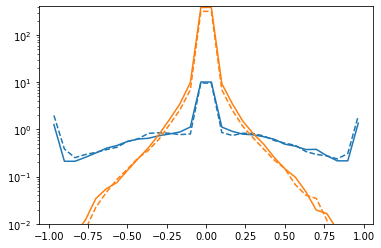

In [13]:
l=plt.plot(grid, urq_protons/widths)[0]
plt.plot(grid, sib_protons/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
l=plt.plot(grid, urq_pions/widths)[0]
plt.plot(grid, sib_pions/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(1e-2,)
plt.semilogy()

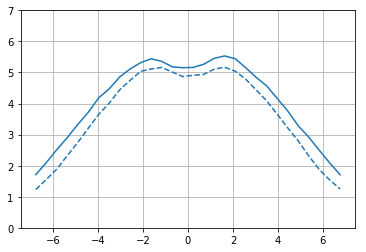

In [14]:
l=plt.plot(eta_grid, urq_charged_eta/wdths_eta)[0]
plt.plot(eta_grid, sib_charged_eta/wdths_eta,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(0,7)
plt.grid()
# plt.semilogy()

In [16]:
event_kinematics = EventKinematics(
    plab=1000. * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc1_prop=(4,2),
#     nuc2_prop=(12,6)
)

In [17]:
# event_kinematics = EventKinematics(
#     plab=1000. * GeV,
# #     p1pdg=2212,
# #     p2pdg=2212
#     nuc1_prop=(4,2),
#     nuc2_prop=(12,6)
# )
n_bins = 30
# bins = np.linspace(-1,1.,n_bins+1)
bins = np.logspace(-1,1,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
urq_pions = np.zeros(n_bins)
urq_protons = np.zeros(n_bins)

n_events = 1000
norm = 1./float(n_events)

for event in generator.event_generator(event_kinematics, n_events):
#     event.filter_final_state_charged()
    event.filter_final_state_charged()
    urq_protons += norm*np.histogram(event.en[event.p_ids == 2212],bins=bins)[0]
    urq_pions += norm*np.histogram(event.en[np.abs(event.p_ids) == 211],bins=bins)[0]


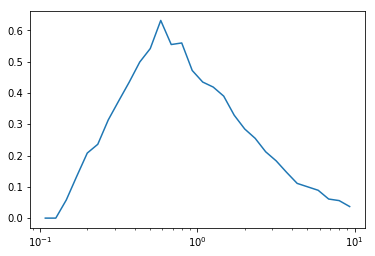

In [18]:
plt.semilogx(grid, urq_pions)
# plt.plot(grid, urq_protons)

In [26]:
_ = [generator.set_stable(p) for p in [421,-421,411,-411]]
_ = [sibyll.set_stable(p) for p in [421,-421,411,-411]]

In [37]:
n_bins = 30
bins = np.linspace(0,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
dpm_dpm = np.zeros(n_bins)
d0_dpm = np.zeros(n_bins)
dpm_sib = np.zeros(n_bins)
d0_sib = np.zeros(n_bins)
n_events = 200000
norm = 1./float(n_events)

# This
for event in generator.event_generator(event_kinematics, n_events):
    event.filter_final_state()
    d0_dpm += norm*np.histogram(np.abs(event.xf[(event.p_ids == 421) | (event.p_ids == -421)]),bins=bins)[0]
    dpm_dpm += norm*np.histogram(np.abs(event.xf[(event.p_ids == 411) | (event.p_ids == -411)]),bins=bins)[0]
for event in sibyll.event_generator(event_kinematics, n_events):
    event.filter_final_state()
    d0_sib += norm*np.histogram(np.abs(event.xf[(event.p_ids == 421) | (event.p_ids == -421)]),bins=bins)[0]
    dpm_sib += norm*np.histogram(np.abs(event.xf[(event.p_ids == 411) | (event.p_ids == -411)]),bins=bins)[0]

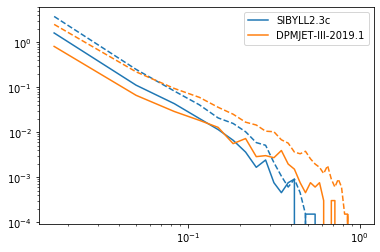

In [39]:
l=plt.plot(grid, d0_sib/widths, ls='--')[0]
plt.plot(grid, dpm_sib/widths,c=l.get_color(),label='SIBYLL2.3c')
l=plt.plot(grid, d0_dpm/widths, ls='--')[0]
plt.plot(grid, dpm_dpm/widths,c=l.get_color(),label='DPMJET-III-2019.1')
# l=plt.plot(grid, urq_pions/widths)[0]
# plt.plot(grid, sib_pions/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
# plt.ylim(1e-2,)
plt.loglog()
plt.legend()

In [40]:
from impy.common 

ImportError: cannot import name '_pdata' from 'impy.common' (/mnt/c/Users/afedy/OneDrive/devel/git/impy/impy/common.py)